<a href="https://colab.research.google.com/github/JCSR2022/Alura_Data_Science/blob/main/Advanced_Modeling_Techniques/2212_Regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style='color: green; font-size: 36px; font-weight: bold;'><b>Regresión Lineal - Técnicas avanzadas de modelado</b></h1>

# <font color='red' style='font-size: 30px;'>1.2 Conociendo el Dataset</font>
<hr style='border: 2px solid red;'>

## Importando la biblioteca pandas

https://pandas.pydata.org/

## El Dataset y el Proyecto
<hr>

### Descripción:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>El mercado inmobiliario ha sido objeto de diversos estudios e investigaciones en los últimos tiempos. La crisis financiera que afecta la economía ha impactado significativamente las inversiones y los beneficios provenientes de este sector. Este escenario fomenta un mayor interés en estudios de predicción de demanda basados en las características de este mercado, de los inmuebles y de su entorno.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>En este contexto, el objetivo principal de nuestro proyecto es desarrollar un sistema de evaluación inmobiliaria utilizando la metodología de regresiones lineales, que es una de las técnicas de <b>machine learning</b>.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Nuestro <b>dataset</b> es una muestra aleatoria de tamaño 5000 de inmuebles disponibles para la venta en la ciudad de Cartagena.</p>

### Datos:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>Valor</b> - Valor (USD) de oferta del inmueble</li>
    <li><b>Área</b> - Área del inmueble en m²</li>
    <li><b>Dist_Playa</b> - Distancia del inmueble hasta la playa (km) (en línea recta)</li>
    <li><b>Dist_Farmacia</b> - Distancia del inmueble hasta la farmacia más cercana (km) (en línea recta)</li>
</ul>

## Lectura de los datos

In [1]:
import pandas as pd

#https://github.com/JCSR2022/Alura_Data_Science/blob/main/Advanced_Modeling_Techniques/dataset.csv
git_raw = 'https://raw.githubusercontent.com/'
url_github = 'JCSR2022/Alura_Data_Science/main/Advanced_Modeling_Techniques/dataset.csv'
datos = pd.read_csv(git_raw + url_github,sep =';')
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Valor          5000 non-null   int64  
 1   Area           5000 non-null   int64  
 2   Dist_Playa     5000 non-null   float64
 3   Dist_Farmacia  5000 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 156.4 KB


## Visualizar los datos

In [2]:
datos.head()

,Valor,Area,Dist_Playa,Dist_Farmacia
0,4600000,280,0.240925,0.793637
1,900000,208,0.904136,0.134494
2,2550000,170,0.059525,0.423318
3,550000,100,2.883181,0.525064
4,2200000,164,0.239758,0.192374


## Verificando el tamaño del dataset

In [3]:
datos.shape

(5000, 4)

# <font color='red' style='font-size: 30px;'>1.3 Análisis preliminar</font>
<hr style='border: 2px solid red;'>

## Estadística descriptiva

In [4]:
datos.describe()


,Valor,Area,Dist_Playa,Dist_Farmacia
count,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,1.402926e+06,121.944800,3.021920,0.497160
std,1.883269e+06,90.536969,3.170933,0.291355
min,7.500000e+04,16.000000,0.000000,0.000331
25%,4.600000e+05,70.000000,0.438417,0.238640
50%,8.200000e+05,93.000000,1.476958,0.503260
75%,1.590000e+06,146.000000,5.605379,0.747737
max,2.500000e+07,2000.000000,17.962942,0.999987


## Matriz de correlación

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>El <b>coeficiente de correlación</b> es una medida de asociación lineal entre dos variables y se sitúa entre <b>-1</b> y <b>+1</b>, donde <b>-1</b> indica una asociación negativa perfecta y <b>+1</b> indica una asociación positiva perfecta.</p>


In [5]:
datos.corr()

,Valor,Area,Dist_Playa,Dist_Farmacia
Valor,1.000000,0.710974,-0.366542,-0.024366
Area,0.710974,1.000000,-0.283371,-0.030990
Dist_Playa,-0.366542,-0.283371,1.000000,0.025645
Dist_Farmacia,-0.024366,-0.030990,0.025645,1.000000


# <font color='red' style='font-size: 30px;'>2.1 Comportamiento de la variable Dependiente (y)</font>
<hr style='border: 2px solid red;'>

## Importando la biblioteca seaborn
https://seaborn.pydata.org/

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Seaborn es una biblioteca de Python para la visualización de datos basada en matplotlib. Proporciona una interfaz de alto nivel para crear gráficos estadísticos.</p>



In [6]:
import seaborn as sns

#importo tmabien plt
import matplotlib.pyplot as plt

## Configuraciones para el formato de los gráficos

In [7]:
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

# style -> white, dark, whitegrid, darkgrid, ticks

sns.set_palette('Accent')
sns.set_style('darkgrid')


## Box plot de la variable *dependiente* (y)

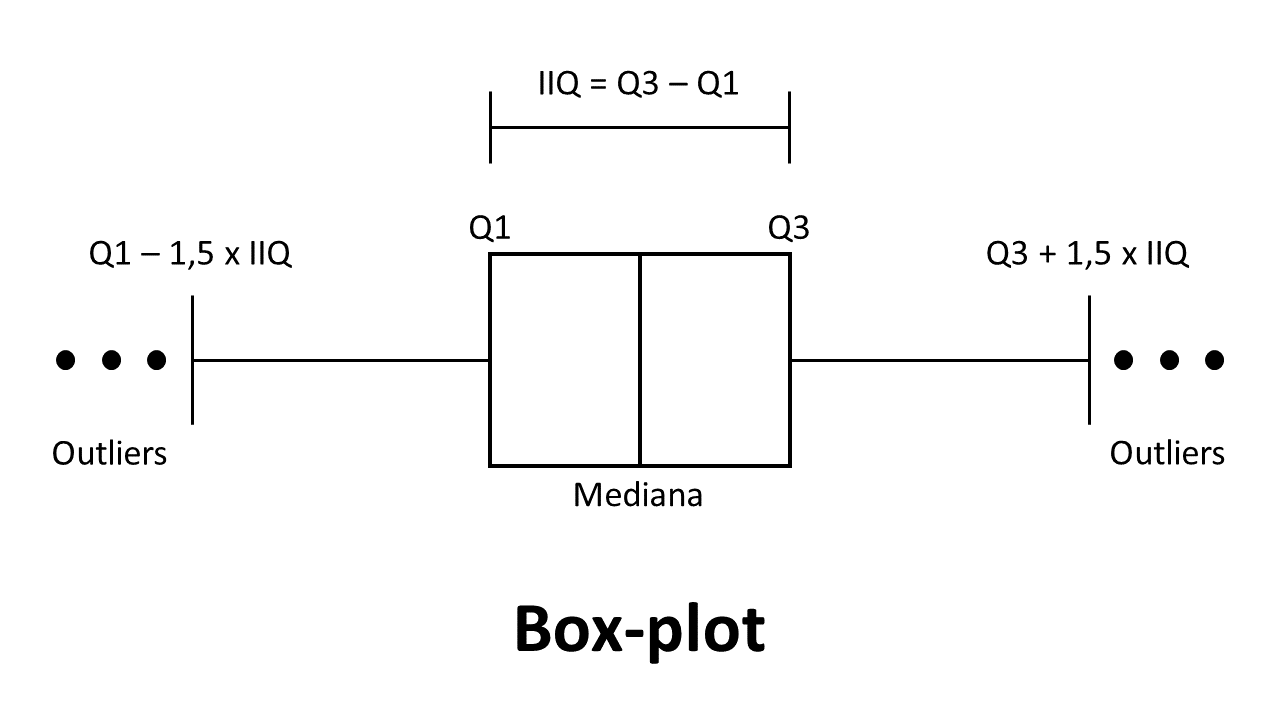

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

In [8]:
datos.columns

Index(['Valor', 'Area', 'Dist_Playa', 'Dist_Farmacia'], dtype='object')

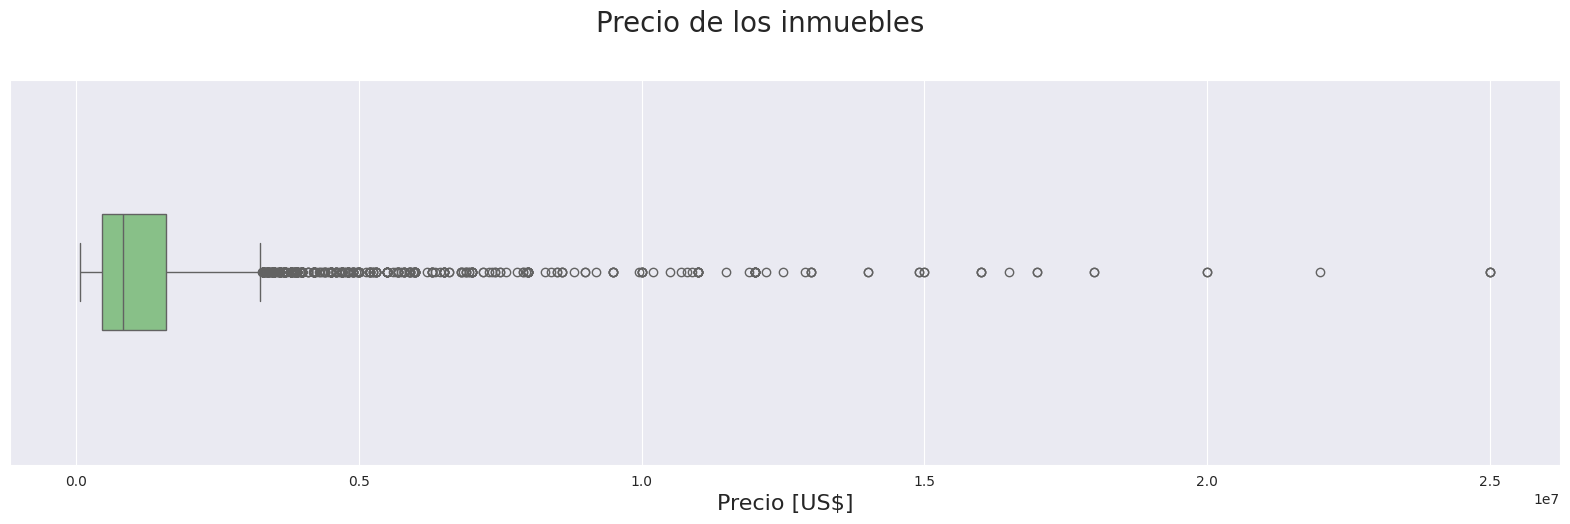

In [9]:
ax = sns.boxplot(data=datos['Valor'],orient='h',width=0.3)
ax.figure.set_size_inches(20, 5)
ax.figure.suptitle('Precio de los inmuebles',fontsize=20,y=1.02)
ax.set_xlabel('Precio [US$]',fontsize=16)
ax;

Gráfico guardado en: /content/drive/MyDrive/PruebasAlura/temp_graficas/


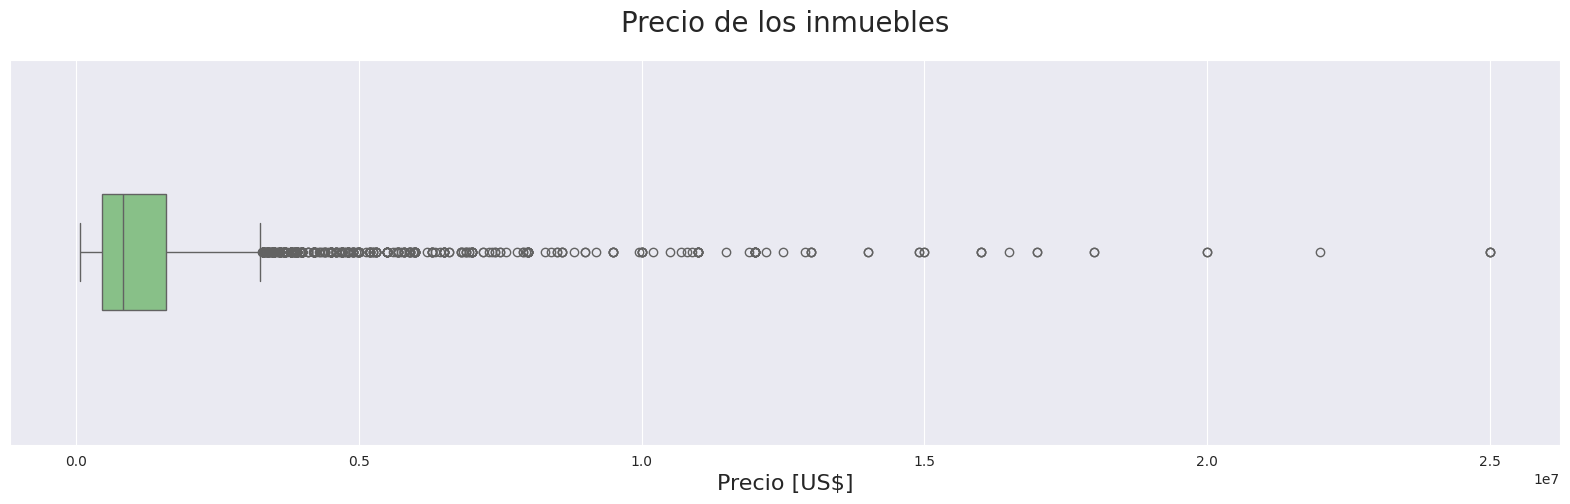

In [10]:
def plot_boxplot(data, x, title=None, xlabel=None, orientation='h', save_path=None):
    """
    Crea un boxplot y opcionalmente lo guarda en disco.

    Parámetros:
    -----------
    data : DataFrame
        DataFrame de pandas con los datos
    x : str
        Nombre de la columna para el boxplot
    title : str, opcional
        Título del gráfico
    xlabel : str, opcional
        Etiqueta para el eje x
    orientation : str, opcional
        Orientación del boxplot: 'h' para horizontal, 'v' para vertical
    save_path : str, opcional
        Ruta donde guardar el gráfico. Si es None, no se guarda.

    Returns:
    --------
    ax : Axes
        El objeto axes de matplotlib
    """
    # Crear la figura y el boxplot
    fig, ax = plt.subplots(figsize=(20, 5))

    # Crear el boxplot
    sns.boxplot(data=data[x], orient=orientation, width=0.3, ax=ax)

    # Personalizar el gráfico
    if title:
        ax.set_title(title, fontsize=20, pad=20)
    if xlabel:
        ax.set_xlabel(xlabel, fontsize=16)

    # Guardar si se especifica una ruta
    if save_path:
        final_path = save_path+title+'.png'
        plt.savefig(final_path, dpi=300, bbox_inches='tight')
        print(f"Gráfico guardado en: {save_path}")

    return ax

path ='/content/drive/MyDrive/PruebasAlura/temp_graficas/'
titulo = 'Precio de los inmuebles'
etiqueta_x = 'Precio [US$]'
boxplot_valor = plot_boxplot(datos,'Valor',titulo,etiqueta_x,'h',path)

# <font color='red' style='font-size: 30px;'>2.2 Distribución de Frecuencias</font>
<hr style='border: 2px solid red;'>

## Distribución de frecuencias de la variable *dependiente* (y)

https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot

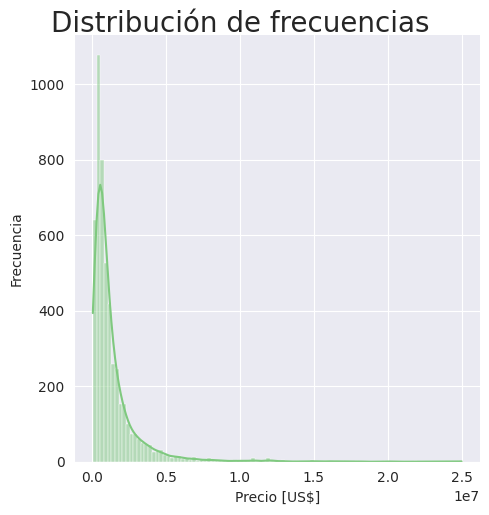

In [11]:
ax = sns.displot(data=datos['Valor'], kde=True, bins=100)
ax.fig.suptitle('Distribución de frecuencias ',fontsize=20,y=1.02)
ax.set_axis_labels('Precio [US$]', 'Frecuencia');
ax;

/content/drive/MyDrive/PruebasAlura/temp_graficas/Precio_Área_Distancia a Playa.png
Gráfico guardado en: /content/drive/MyDrive/PruebasAlura/temp_graficas/


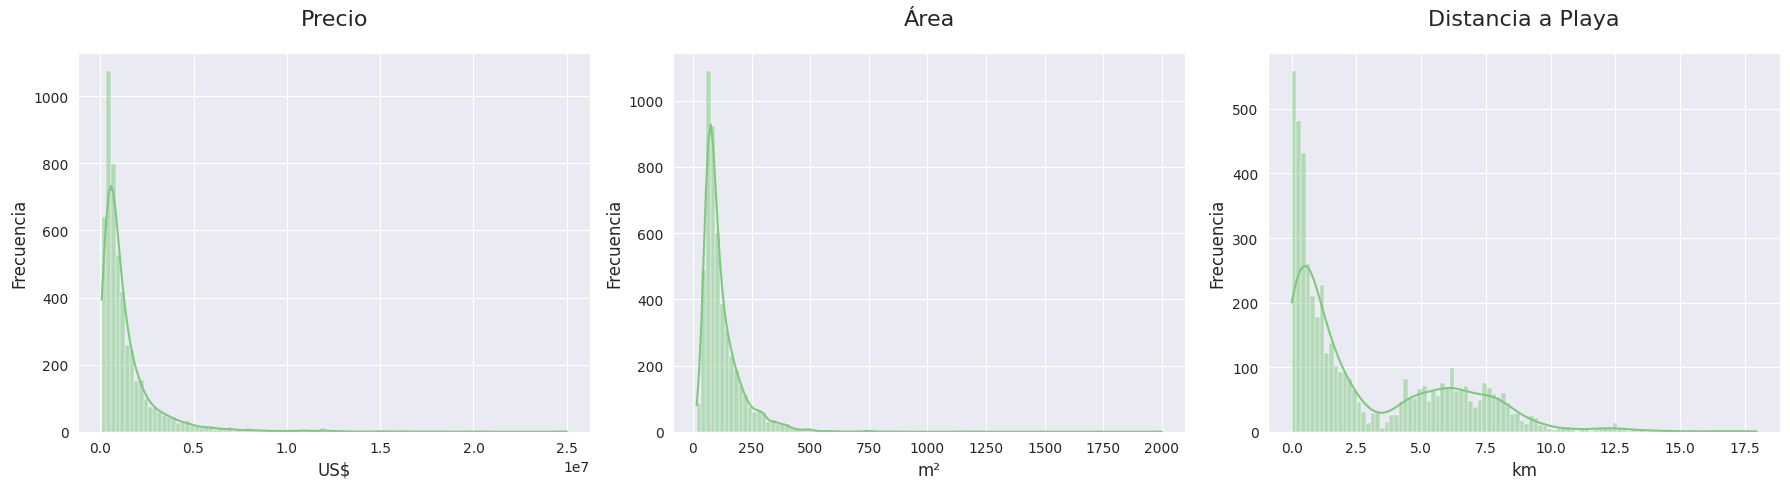

In [12]:
def plot_multiple_distributions(data, columns, titles=None, xlabels=None,
                               bins=100, kde=True, save_path=None):
    """
    Crea múltiples histogramas en una sola figura.
    """
    n = len(columns)
    fig, axes = plt.subplots(1, n, figsize=(6*n, 5))

    if n == 1:
        axes = [axes]

    for i, col in enumerate(columns):
        sns.histplot(data=data[col], kde=kde, bins=bins, ax=axes[i])

        if titles and i < len(titles):
            axes[i].set_title(titles[i], fontsize=16, pad=20)

        x_label = xlabels[i] if (xlabels and i < len(xlabels)) else col
        axes[i].set_xlabel(x_label, fontsize=12)
        axes[i].set_ylabel('Frecuencia', fontsize=12)

    plt.tight_layout()

    if save_path:
        final_path = save_path+'_'.join(titles)+'.png'
        print(final_path)
        plt.savefig(final_path, dpi=300, bbox_inches='tight')
        print(f"Gráfico guardado en: {save_path}")

    return axes

distribuciones = plot_multiple_distributions(datos,
                                           columns=['Valor', 'Area', 'Dist_Playa'],
                                           titles=['Precio', 'Área', 'Distancia a Playa'],
                                           xlabels=['US$', 'm²', 'km'],
                                           save_path='/content/drive/MyDrive/PruebasAlura/temp_graficas/')

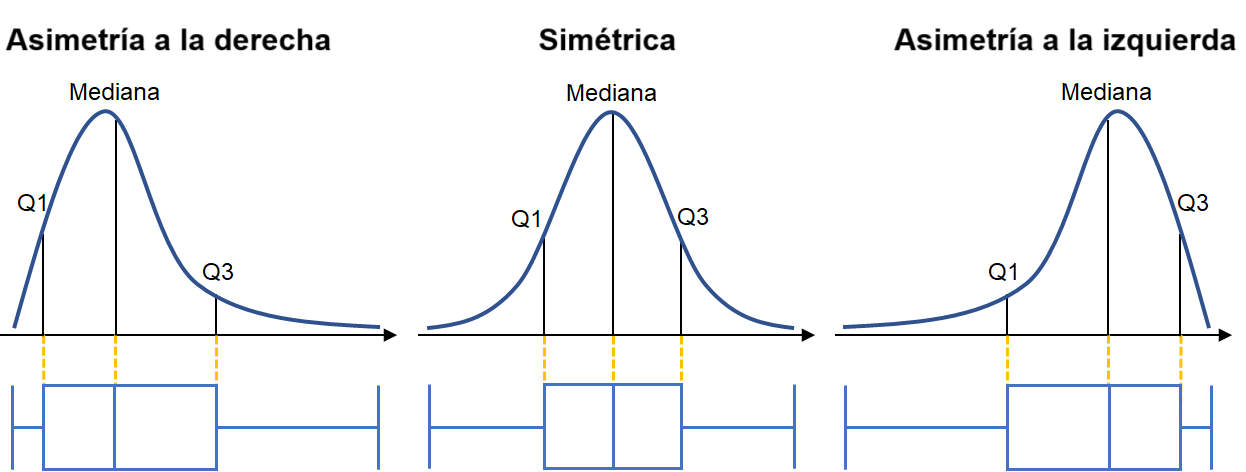

# <font color='red' style='font-size: 30px;'>2.3 Disperión entre las Variables</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersión entre las variables del dataset

## seaborn.pairplot

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Grafica la relación entre pares de variables en un dataset.</p>

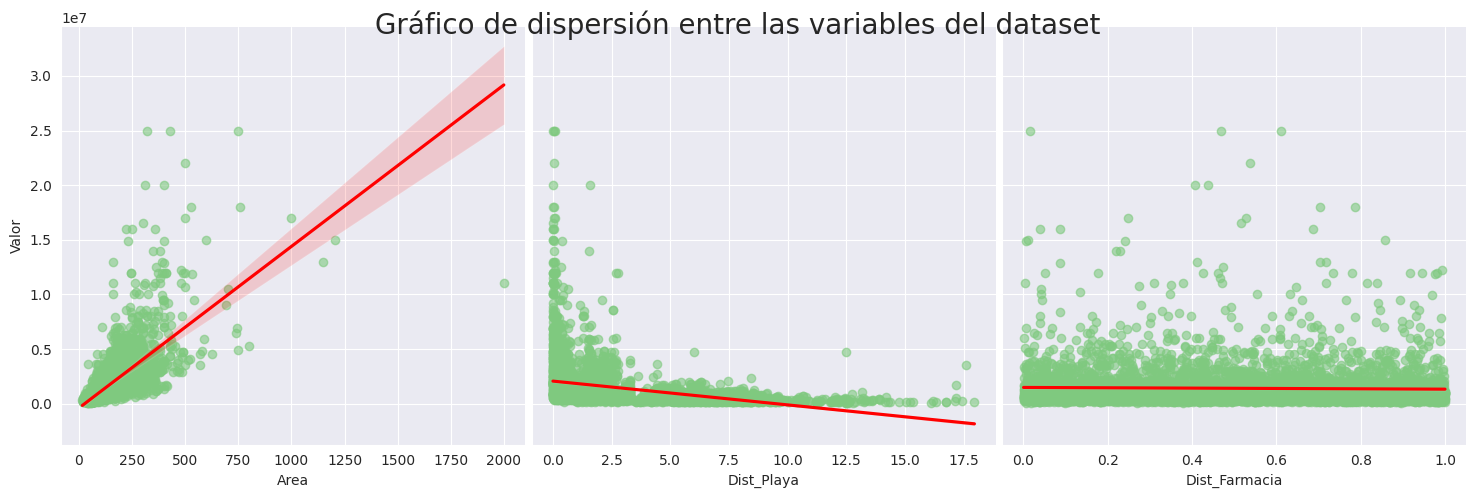

In [13]:
y_on_study = 'Valor'
x_features = [ col for col in datos.columns if not col == y_on_study]
ax = sns.pairplot(datos,y_vars=y_on_study,x_vars=x_features,kind='reg',height=5,plot_kws={'line_kws': {'color': 'red'}, 'scatter_kws': {'alpha': 0.6}})
ax.fig.suptitle('Gráfico de dispersión entre las variables del dataset',fontsize=20)
ax;

Gráfico guardado en: pairplot_dispersion.png


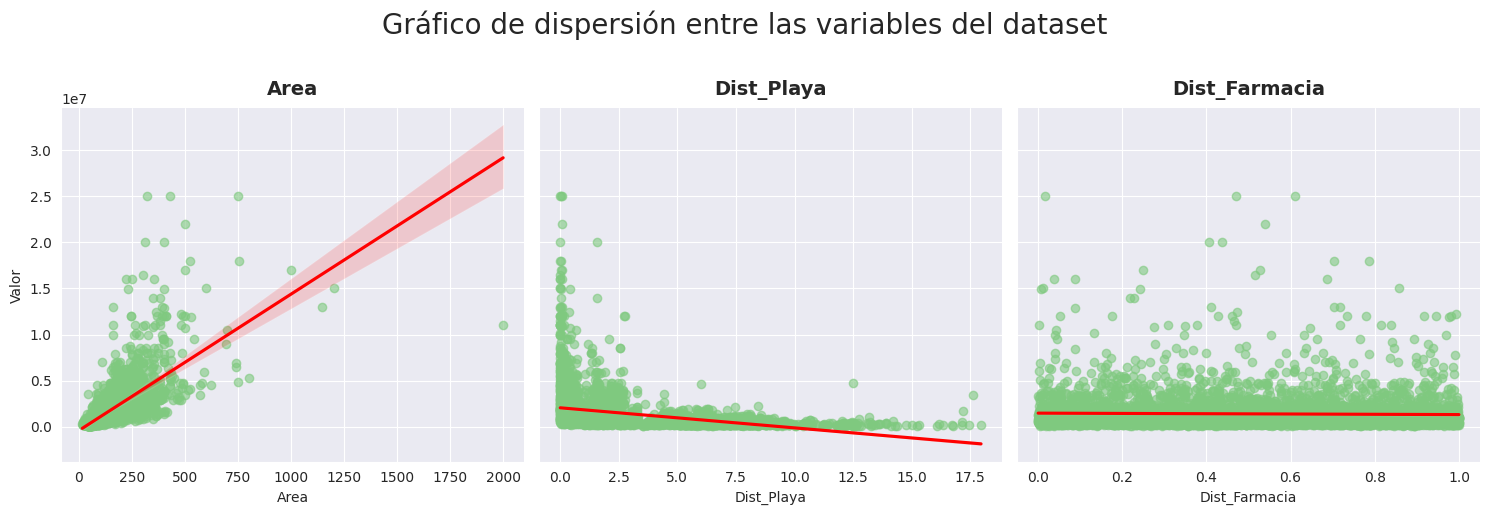

In [14]:
def plot_pairplot(data, y_on_study, x_features=None, kind='reg', height=5,
                  title=None, save_path=None):
    """
    Crea un pairplot con el gráfico de dispersión entre variables.

    Parámetros:
    -----------
    data : DataFrame
        DataFrame de pandas con los datos
    y_on_study : str
        Variable dependiente (eje y)
    x_features : list, opcional
        Lista de variables independientes. Si es None, usa todas excepto y_on_study
    kind : str, opcional
        Tipo de gráfico: 'reg' para regresión, 'scatter' para solo dispersión
    height : int, opcional
        Altura de cada gráfico individual
    title : str, opcional
        Título principal del gráfico
    save_path : str, opcional
        Ruta donde guardar el gráfico

    Returns:
    --------
    g : PairGrid
        El objeto PairGrid de seaborn
    """
    # Si no se especifican x_features, usar todas excepto y_on_study
    if x_features is None:
        x_features = [col for col in data.columns if col != y_on_study]

    # Crear el pairplot
    g = sns.pairplot(data=data,
                     y_vars=y_on_study,
                     x_vars=x_features,
                     kind=kind,
                     plot_kws={'line_kws': {'color': 'red'}, 'scatter_kws': {'alpha': 0.6}},
                     height=height)

    # Agregar título principal
    if title:
        g.fig.suptitle(title, fontsize=20, y=1.02)

    # Agregar subtítulos para cada gráfico (nombre de la columna x)
    for i, ax in enumerate(g.axes[0]):
        if i < len(x_features):
            # El subtítulo será el nombre de la columna
            ax.set_title(f"{x_features[i]}", fontsize=14, fontweight='bold', pad=10)

    # Ajustar layout para evitar superposiciones
    plt.tight_layout()

    # Guardar si se especifica una ruta
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Gráfico guardado en: {save_path}")

    return g

# Ejemplo de uso con tus datos
y_on_study = 'Valor'
x_features = [col for col in datos.columns if col != y_on_study]


pairplot_dispersion = plot_pairplot(datos,
                                    y_on_study=y_on_study,
                                    x_features=x_features,
                                    kind='reg',
                                    height=5,
                                    title='Gráfico de dispersión entre las variables del dataset',
                                    save_path='pairplot_dispersion.png')

# <font color='red' style='font-size: 30px;'>3.1 Transformando los Datos</font>
<hr style='border: 2px solid red;'>

## Distribución Normal
<hr>

### ¿Por qué?
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Las pruebas paramétricas asumen que los datos de la muestra fueron recolectados de una población con una distribución de probabilidad conocida. Gran parte de las pruebas estadísticas asumen que los datos siguen una distribución normal (t de Student, intervalos de confianza, etc.).</p>


## Importando la biblioteca numpy

In [15]:
import numpy as np

## Aplicando la transformación logarítmica a los datos del *dataset*

https://numpy.org/doc/stable/reference/generated/numpy.log.html

In [16]:
datos.describe()

,Valor,Area,Dist_Playa,Dist_Farmacia
count,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,1.402926e+06,121.944800,3.021920,0.497160
std,1.883269e+06,90.536969,3.170933,0.291355
min,7.500000e+04,16.000000,0.000000,0.000331
25%,4.600000e+05,70.000000,0.438417,0.238640
50%,8.200000e+05,93.000000,1.476958,0.503260
75%,1.590000e+06,146.000000,5.605379,0.747737
max,2.500000e+07,2000.000000,17.962942,0.999987


In [17]:
datos['Dist_Playa'].min()

0.0

In [18]:
# def find_min_value_not0(datos,column_name):
#     """
#     Encuentra el valor mínimo en una columna de un DataFrame que no sea cero.
#     """
#     min_value = float('inf')  # Inicializa con un valor muy grande
#     for value in datos[column_name]:
#         if value != 0 and value < min_value:
#             min_value = value
#     return min_value

# #Se escoge como minima distancia , aprox a cero 10 veces menos que la menor distancia para no afectar la relacion de los datos
# min_dist_Playa = find_min_value_not0(datos,'Dist_Playa')/10

# # Operación vectorizada con np.where()
# #datos['Dist_Playa'] = datos['Dist_Playa'].apply(lambda x: x if x <= 0 else min_dist_Playa)
# datos['Dist_Playa'] = np.where(datos['Dist_Playa'] >0, datos['Dist_Playa'], min_dist_Playa)


#O simplemente sumar una constatnte a los valores
datos['Dist_Playa'] =datos['Dist_Playa']+1

In [19]:
for col in datos.columns:
  datos['log_'+col] = np.log(datos[col])

# datos['log_valor'] = np.log(datos['Valor'])
# datos['log_Area'] = np.log(datos['Area'])
# datos['log_Dist_Playa'] = np.log(datos['Dist_Playa'])
# datos['log_Dist_Farmacia'] = np.log(datos['Dist_Farmacia'])


In [20]:
datos.describe()

,Valor,Area,Dist_Playa,Dist_Farmacia,log_Valor,log_Area,log_Dist_Playa,log_Dist_Farmacia
count,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.402926e+06,121.944800,4.021920,0.497160,13.694384,4.624733,1.086617,-1.025009
std,1.883269e+06,90.536969,3.170933,0.291355,0.903614,0.568679,0.781824,1.042768
min,7.500000e+04,16.000000,1.000000,0.000331,11.225243,2.772589,0.000000,-8.013392
25%,4.600000e+05,70.000000,1.438417,0.238640,13.038982,4.248495,0.363543,-1.432801
50%,8.200000e+05,93.000000,2.476958,0.503260,13.617060,4.532599,0.907031,-0.686648
75%,1.590000e+06,146.000000,6.605379,0.747737,14.279245,4.983607,1.887883,-0.290704
max,2.500000e+07,2000.000000,18.962942,0.999987,17.034386,7.600902,2.942487,-0.000013


## Distribución de frecuencia de la variable *dependiente transformada* (y)

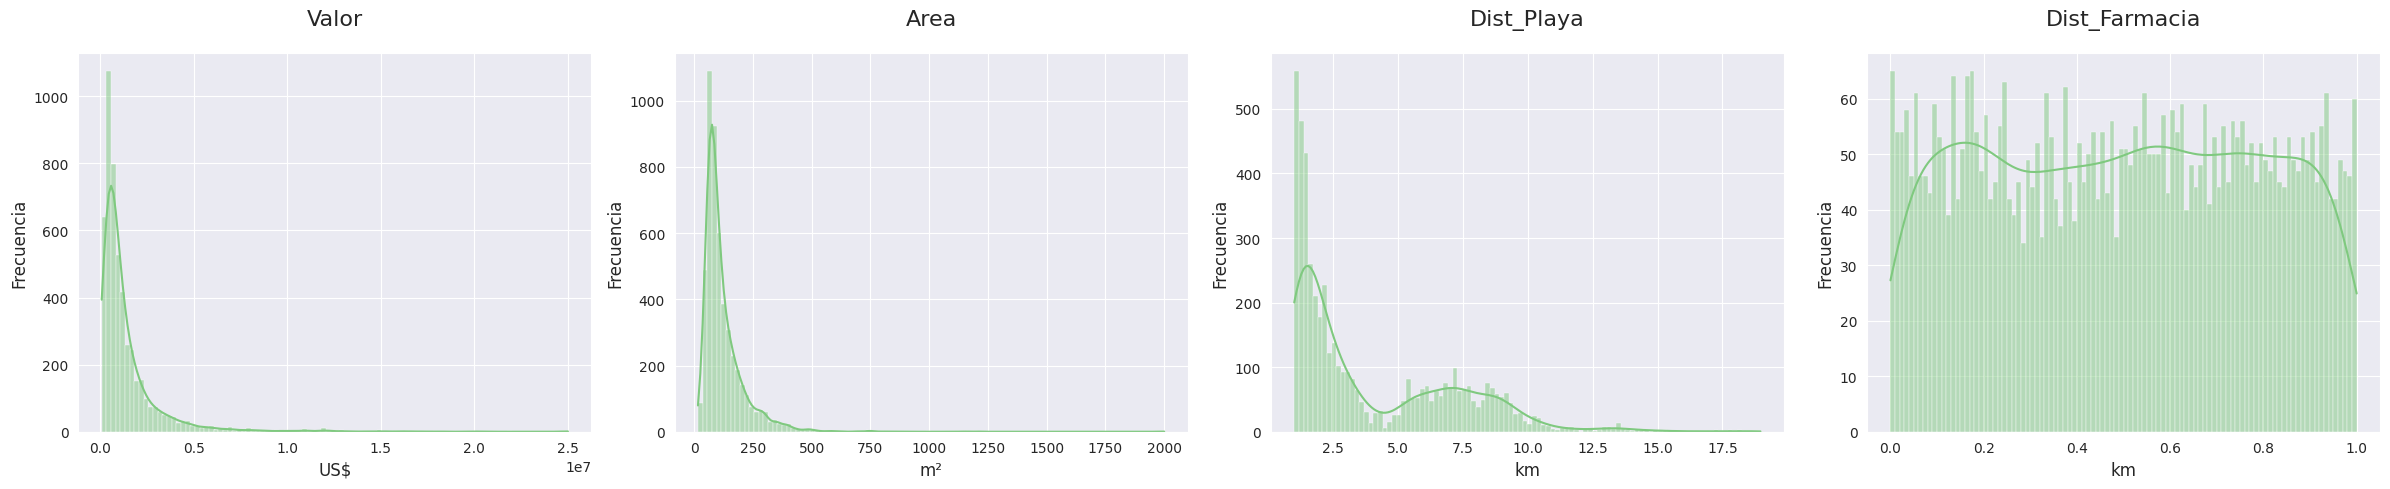

In [21]:
plot_multiple_distributions(datos,columns=['Valor', 'Area', 'Dist_Playa', 'Dist_Farmacia'],
                            titles=['Valor', 'Area', 'Dist_Playa', 'Dist_Farmacia'],
                            xlabels=['US$', 'm²', 'km','km']);

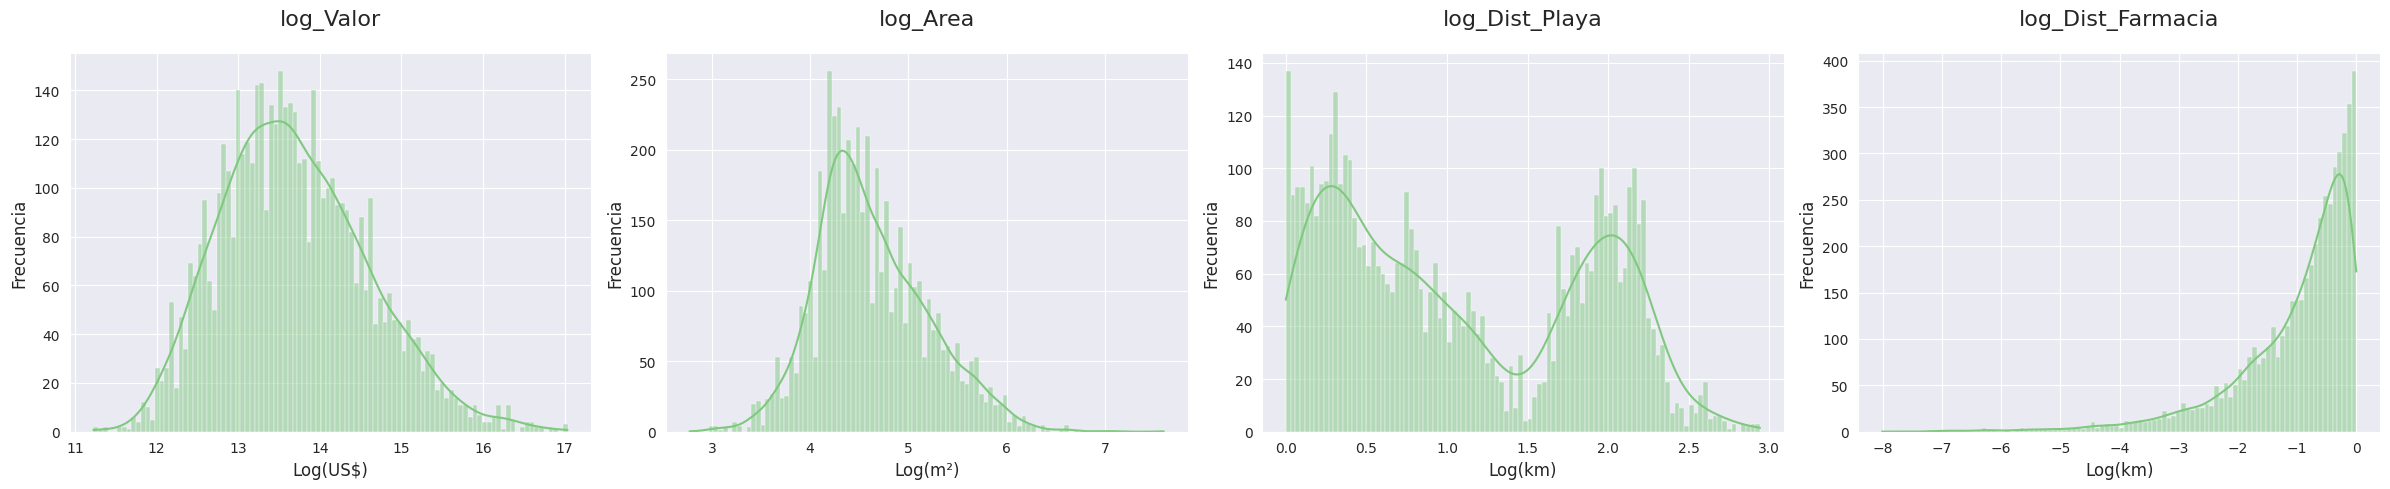

In [22]:
plot_multiple_distributions(datos,columns=['log_Valor', 'log_Area','log_Dist_Playa','log_Dist_Farmacia'],
                            titles=['log_Valor', 'log_Area','log_Dist_Playa','log_Dist_Farmacia'],
                            xlabels=['Log(US$)', 'Log(m²)', 'Log(km)','Log(km)']);

# <font color='red' style='font-size: 30px;'>3.2 Verificando La Relación Lineal</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersión entre las variables transformadas del dataset

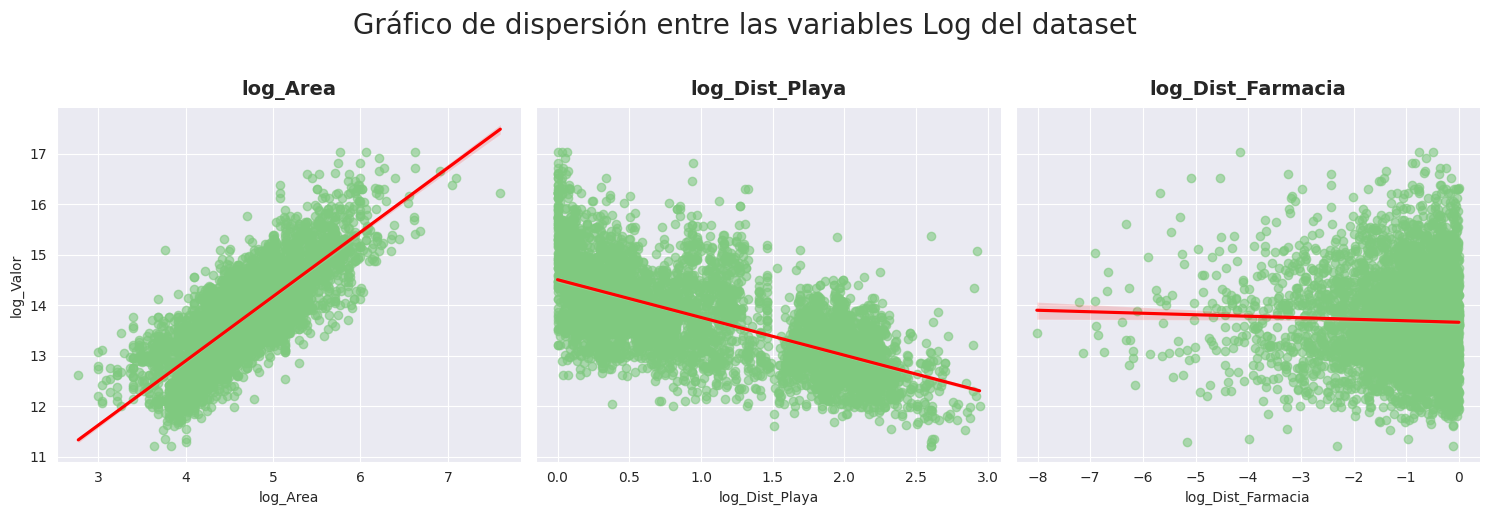

In [23]:
y_on_study ='log_Valor'
x_features = [col for col in datos.columns if col != y_on_study and col.startswith('log')]

plot_pairplot(datos,y_on_study=y_on_study,x_features=x_features,kind='reg',height=5,
              title='Gráfico de dispersión entre las variables Log del dataset');

# <font color='red' style='font-size: 30px;'>4.1 Creando los *Datasets* de Entrenamiento y Prueba</font>
<hr style='border: 2px solid red;'>

## Importando *train_test_split* de la biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [24]:
from sklearn.model_selection import train_test_split


## Creando una Serie (pandas) para almacenar el Precio de los Inmuebles (y)

In [28]:
y = datos['log_Valor']
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 5000 entries, 0 to 4999
Series name: log_Valor
Non-Null Count  Dtype  
--------------  -----  
5000 non-null   float64
dtypes: float64(1)
memory usage: 39.2 KB


## Creando un DataFrame (pandas) para almacenar las variables explicativas (X)

In [29]:
x_features = [col for col in datos.columns if col != y_on_study and col.startswith('log')]
x = datos[   x_features    ]
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   log_Area           5000 non-null   float64
 1   log_Dist_Playa     5000 non-null   float64
 2   log_Dist_Farmacia  5000 non-null   float64
dtypes: float64(3)
memory usage: 117.3 KB


## Criando los datasets de Entrenamiento y Prueba

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2811)



In [40]:
x_train

,log_Area,log_Dist_Playa,log_Dist_Farmacia
2661,5.945421,0.000000,-0.764403
912,3.135494,0.972865,-0.184789
3042,4.317488,1.794961,-0.467182
141,3.401197,0.310455,-0.196738
3854,5.676754,0.032193,-2.232350
...,...,...,...
3657,5.075174,2.023480,-0.926361
979,4.174387,2.296141,-1.775670
2389,4.394449,1.367741,-0.680417
447,3.951244,2.166841,-1.415443


# Regresión Lineal
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>El análisis de regresión se refiere al estudio de la dependencia de una variable (la variable <b>dependiente</b>) con respecto a una o más variables, las variables explicativas, con el objetivo de estimar y/o predecir el valor medio de la primera en función de los valores conocidos o fijados en las últimas.</p>


## scikit-learn (https://scikit-learn.org/stable/)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'><b>scikit-learn</b> es un módulo de Python especializado en soluciones de <b>machine learning</b>.</p>




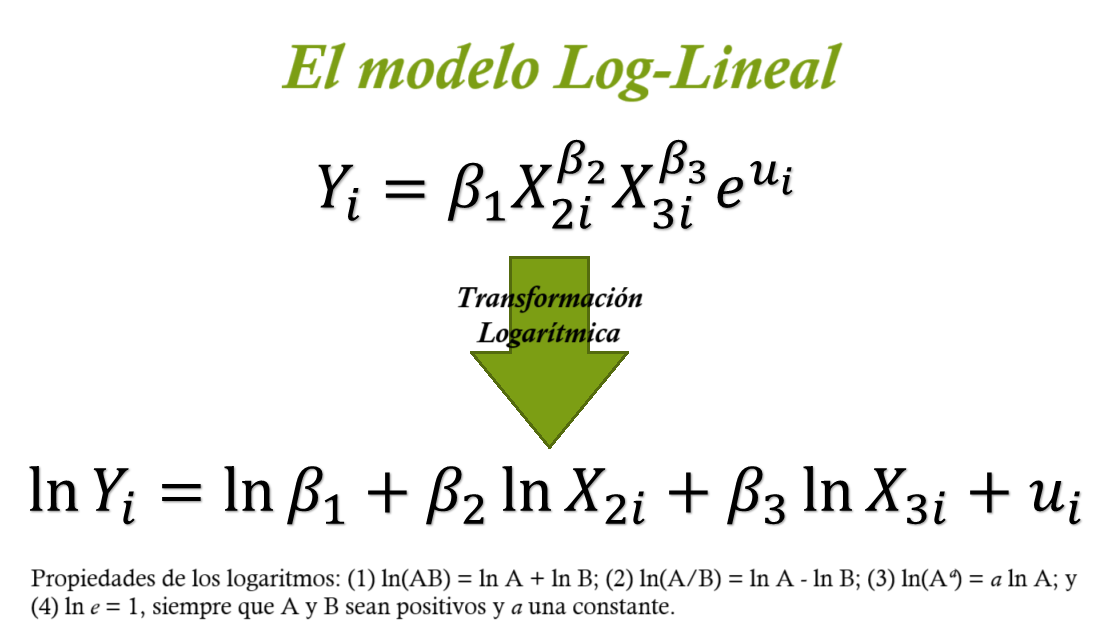

## Estimando el modelo con statsmodels

In [31]:
import statsmodels.api as sm

x_train_const = sm.add_constant(x_train)
modelo_stats = sm.OLS(y_train, x_train_const,hasconst=True)
result_stats = modelo_stats.fit()

# <font color='red' style='font-size: 30px;'>4.2 Evaluando el Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Evaluando los resultados del modelo

In [36]:
print(result_stats.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     5495.
Date:                Fri, 27 Feb 2026   Prob (F-statistic):               0.00
Time:                        22:52:05   Log-Likelihood:                -2045.0
No. Observations:                4000   AIC:                             4098.
Df Residuals:                    3996   BIC:                             4123.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.3328      0.05

In [38]:
p_values = result_stats.pvalues
print(p_values)

const                0.000000
log_Area             0.000000
log_Dist_Playa       0.000000
log_Dist_Farmacia    0.686659
dtype: float64


In [39]:
# umbral de significancia
alpha = 0.05

# Filtramos las variables cuyo p-value sea menor a alpha
valid_features = p_values[p_values < alpha].index.tolist()

# excluir la 'const' de  lista de variables válidas:
if 'const' in valid_features:
    valid_features.remove('const')

print(f"Variables significativas: {valid_features}")

Variables significativas: ['log_Area', 'log_Dist_Playa']


# <font color='red' style='font-size: 30px;'>4.3 Modificando el Modelo y evaluando nuevamente el Ajuste</font>
<hr style='border: 2px solid red;'>

## Creando un nuevo conjunto de variables explicativas (X)

In [47]:
X = datos[['log_Area','log_Dist_Playa']]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2811)
x_train_const = sm.add_constant(x_train)
modelo_stats = sm.OLS(y_train, x_train_const,hasconst=True)
result_stats = modelo_stats.fit()

print(result_stats.summary())


                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     8244.
Date:                Fri, 27 Feb 2026   Prob (F-statistic):               0.00
Time:                        23:40:37   Log-Likelihood:                -2045.1
No. Observations:                4000   AIC:                             4096.
Df Residuals:                    3997   BIC:                             4115.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.3349      0.059    158.

## Creando los datasets de entrenamiento y prueba

## Estimando el modelo con statsmodels

## Evaluando los resultados de prueba del nuevo modelo

### Prueba de significancia conjunta de los parámetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Prob (F-statistic) <= 0.05 (<b>OK</b>)</p>

### Prueba de significancia individual de los parámetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>P>|t| <= 0.05 (<b>OK</b>)</p>

In [42]:
import pandas as pd
import statsmodels.api as sm

def backward_elimination(X, y, alpha=0.05):
    """
    Elimina variables una a una basándose en el p-value más alto
    hasta que todas sean menores al umbral alpha.
    """
    variables = X.columns.tolist()

    while len(variables) > 0:
        # Añadimos la constante en cada iteración porque statsmodels no lo hace solo
        X_with_const = sm.add_constant(X[variables])

        # Ajustamos el modelo OLS
        model = sm.OLS(y, X_with_const).fit()

        # Obtenemos los p-values de las variables (excluyendo la constante)
        p_values = model.pvalues.drop('const')

        # Buscamos el p-value máximo
        max_p_value = p_values.max()

        if max_p_value > alpha:
            # Identificamos qué variable tiene ese p-value y la eliminamos de la lista
            excluded_variable = p_values.idxmax()
            variables.remove(excluded_variable)
            print(f"Eliminando '{excluded_variable}' con p-value: {max_p_value:.4f}")
        else:
            # Si el p-value más alto ya es menor al alpha, terminamos
            break

    print("\n✅ Selección finalizada.")
    return variables

# --- Cómo usarla ---
variables_optimas = backward_elimination(x_train, y_train)
x_train_final = x_train[variables_optimas]
x_train_final.columns

Eliminando 'log_Dist_Farmacia' con p-value: 0.6867

✅ Selección finalizada.


Index(['log_Area', 'log_Dist_Playa'], dtype='object')

In [43]:

import pandas as pd
import statsmodels.api as sm

def stepwise_selection_full(X, y, alpha_f=0.05, alpha_t=0.05):
    """
    Realiza Backward Elimination validando primero la significancia global (F)
    y luego la significancia individual (t).
      Prueba de significancia conjunta de los parámetros
        Prob (F-statistic) <= 0.05 (OK)
      Prueba de significancia individual de los parámetros
      P>|t| <= 0.05 (OK)
    """
    variables = X.columns.tolist()

    while len(variables) > 0:
        # 1. Ajustar el modelo con las variables actuales
        X_with_const = sm.add_constant(X[variables])
        model = sm.OLS(y, X_with_const).fit()

        # --- REVISIÓN 1: Significancia Conjunta (Prueba F) ---
        # f_pvalue es el 'Prob (F-statistic)' del summary
        if model.f_pvalue > alpha_f:
            print(f"⚠️ Alerta: El modelo global NO es significativo (Prob F: {model.f_pvalue:.4f}).")
            # Si el modelo base ya falla, podrías decidir detenerte o vaciar la lista
            return []

        # --- REVISIÓN 2: Significancia Individual (Pruebas t) ---
        # Obtenemos p-values excluyendo la constante
        p_values = model.pvalues.drop('const')
        max_p_value = p_values.max()

        if max_p_value > alpha_t:
            excluded_var = p_values.idxmax()
            print(f"Eliminando '{excluded_var}' | p-value t: {max_p_value:.4f} | Prob F actual: {model.f_pvalue:.4e}")
            variables.remove(excluded_var)
        else:
            # Si el peor p-value ya es menor al umbral, el modelo es óptimo
            print(f"\n✅ Modelo final alcanzado.")
            print(f"Prob (F-statistic): {model.f_pvalue:.4e}")
            break

    return variables

features_finales = stepwise_selection_full(x_train, y_train)
features_finales

Eliminando 'log_Dist_Farmacia' | p-value t: 0.6867 | Prob F actual: 0.0000e+00

✅ Modelo final alcanzado.
Prob (F-statistic): 0.0000e+00


['log_Area', 'log_Dist_Playa']

# <font color='red' style='font-size: 30px;'>5.1 Estimando el Modelo con los Datos de Entrenamiento</font>
<hr style='border: 2px solid red;'>

## Importando *LinearRegression* y *metrics* de la biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instanciando la clase *LinearRegression()*

In [50]:
modelo = LinearRegression()

## Utilizando el método *fit()* del objeto "modelo" para estimar nuestro modelo lineal utilizando los datos de Entrenamiento (y_train y X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [51]:
X = datos[features_finales]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2811)

modelo.fit(x_train, y_train)

LinearRegression()

## Obteniendo el coeficiente de determinación (R²) del modelo estimado con los datos de Entrenamiento

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determinación - R²

El coeficiente de Determinación (R²) es una medida resumida que muestra qué tanto la línea de regresión se ajusta a los datos. Es un valor entre 0 y 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [52]:
r2 = modelo.score(x_train, y_train)
print(f"Coeficiente de Determinación (R²): {r2:.4f}")

Coeficiente de Determinación (R²): 0.8049


## Generando las previsiones para los datos de Prueba (X_test) utilizando el método *predict()* del objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [53]:
y_previsto = modelo.predict(x_test)

## Obteniendo el coeficiente de Determinación (R²) para las previsiones de nuestro modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [54]:
r2_test = metrics.r2_score(y_test, y_previsto)
print(f"Coeficiente de Determinación (R²): {r2_test:.4f}")

Coeficiente de Determinación (R²): 0.7904


# <font color='red' style='font-size: 30px;'>5.2 Obteniendo Previsiones Puntuales</font>
<hr style='border: 2px solid red;'>

## Datos de entrada

In [106]:
entrada = x_test.head(1) #x_test.iloc[0]
entrada

,log_Area,log_Dist_Playa
1006,5.273,1.282769


## Generando previsión puntual

In [58]:
modelo.predict(entrada)[0]

np.float64(14.284820061847878)

## Invertiendo la transformación para obtener el valor estimado en dólares (USD)

https://numpy.org/doc/stable/reference/generated/numpy.exp.html

In [115]:
# 1. Realizar la predicción y revertir el logaritmo del precio

print(entrada)
print()

log_pred = modelo.predict(entrada)[0]
prediccion_usd = np.exp(log_pred)

# 2. Obtener el índice original (el ID de la fila en el dataset)
idx_original = entrada.index[0]

# 3. Extraer los valores originales directamente de 'datos' usando ese índice
# Esto evita errores de "log(log)" y es mucho más claro
val_originales = datos.loc[idx_original, ['Area', 'Dist_Playa']]

# 4. Construir el mensaje formateado
detalles = [f"{col}: {val:,.2f}" for col, val in val_originales.items()]

print(f"🏠 Precio estimado para inmueble con {', '.join(detalles)}")
print(f"💰 Resultado: USD ${prediccion_usd:,.2f}")

      log_Area  log_Dist_Playa
1006     5.273        1.282769

🏠 Precio estimado para inmueble con Area: 195.00, Dist_Playa: 3.61
💰 Resultado: USD $1,598,889.78


## Creando un simulador simple

# <font color='red' style='font-size: 30px;'>5.3 Interpretación de los Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

## Obteniendo la intersección del modelo

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>La <b>intersección</b> representa el efecto medio en $y$ (Precio de los Inmuebles) cuando todas las variables explicativas son excluidas del modelo. En el caso del modelo log-lineal, este coeficiente debe transformarse usando la función exponencial para ser presentado en USD.</p>



## Obteniendo los coeficientes de regresión

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Los <b>coeficientes de regresión</b> $\beta_2$ y $\beta_3$ son conocidos como <b>coeficientes parciales de regresión</b> o <b>coeficientes parciales angulares</b>. </p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Un aspecto interesante del modelo log-lineal, que lo convirtió en muy utilizado en los trabajos aplicados, es que los coeficientes angulares $\beta_2$ y $\beta_3$ miden las elasticidades de Y con respecto a $X_2$ y $X_3$, es decir, la variación porcentual de $y$ correspondiente a una determinada variación porcentual (pequeña) en $X_2$ y $X_3$.</p>

## Confirmando el orden de las variables explicativas en el DataFrame

## Creando una lista con los nombres de las variables del modelo

## Creando un DataFrame para almacenar los coeficientes del modelo

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

## Interpretación de los Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluyendo el efecto de las variables explicativas ($X_2=X_3=0$), el efecto medio en el Precio de los Inmuebles sería de <b>USD 11.326,68</b> (exp[9.334916]).
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Área (m²)</b> → Manteniendo constante el valor de $X_3$ (Distancia hasta la Playa), un incremento del 1% en el Área de un inmueble genera, en promedio, un aumento de <b>1.06%</b> en el Precio del Inmueble.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Distancia hasta la Playa (km)</b> → Manteniendo constante el valor de $X_2$ (Área), un incremento del 1% en la Distancia de un inmueble hasta la playa genera, en promedio, una disminución de <b>0.49%</b> en el Precio del Inmueble.
</p>

# <font color='red' style='font-size: 30px;'>5.4 Análisis Gráfico de los Resultados del Modelo</font>
<hr style='border: 2px solid red;'>

## Generando las previsiones del modelo para los datos de Entrenamiento

## Gráfico de dispersión entre el valor estimado y el valor real

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

## Obteniendo los resíduos

## Graficando la distribución de frecuencias de los resíduos